In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import ctypes
import time

In [2]:
file_number = 619

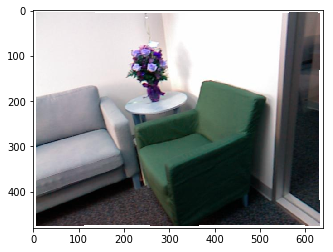

In [3]:
image = cv2.imread('/home/steve/datasets/nyu_dataset/nyu_dataset/rgb/' + str(file_number) + '.bmp')
plt.imshow(image)

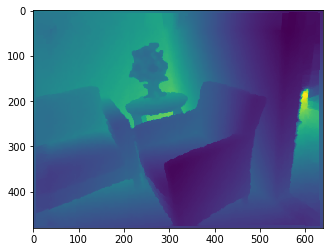

In [4]:
depth = cv2.imread('/home/steve/datasets/nyu_dataset/nyu_dataset/depth/' + str(file_number) + '.png', cv2.IMREAD_ANYDEPTH | cv2.IMREAD_ANYCOLOR)
plt.imshow(depth)

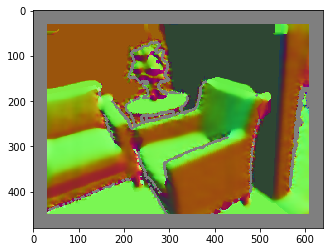

In [5]:
normals = cv2.imread('/home/steve/datasets/nyu_dataset/nyu_dataset/normals/' + str(file_number) + '.exr', cv2.IMREAD_ANYDEPTH | cv2.IMREAD_ANYCOLOR)
plt.imshow((normals + 1) / 2.0)

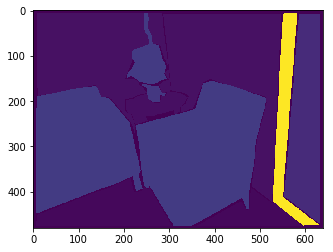

In [6]:
labels = cv2.imread('/home/steve/datasets/nyu_dataset/nyu_dataset/labels/' + str(file_number) + '.png', cv2.IMREAD_ANYDEPTH | cv2.IMREAD_ANYCOLOR)
plt.imshow(labels)

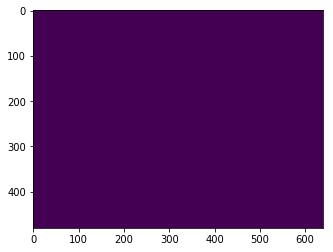

In [7]:
# Floor = 11
# Ceiling = 4
# Chairs = 5
# Walls = 21
# Paper = 15
# Table = 19
# Door = 28
# Poster = 34
# Desk = 36
# Laptop = 37
# Vent = 38?
# Whiteboard = 45
ceiling = (labels == 4)
plt.imshow(ceiling)

In [8]:
print(np.unique(labels))

[  0  11  19  21  59  78  81  83 477]


In [9]:
normals_lib = ctypes.CDLL('build/libCreateNormals.so')
normals_lib.CalculateNormals.argtypes = (ctypes.POINTER(ctypes.c_float),
                                      ctypes.c_int,
                                      ctypes.POINTER(ctypes.c_float),
                                      ctypes.c_int,
                                      ctypes.POINTER(ctypes.c_bool),
                                      ctypes.c_int,
                                      ctypes.c_int,
                                      ctypes.c_int,
                                      ctypes.POINTER(ctypes.c_uint16),
                                      ctypes.POINTER(ctypes.c_uint16),
                                      ctypes.POINTER(ctypes.c_float))

In [10]:
camera_params = [2.3844389626620386e+02,0,3.1304475870804731e+02,0,5.8269103270988637e+02,2.4273913761751615e+02,0,0,1]
normal_params = [5,0.02,30]
flat_labels = [0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
flat_labels_bool = [bool(x) for x in flat_labels]
new_normals = np.zeros(image.shape, dtype=np.float32)

In [11]:
height, width = labels.shape
#x.ctypes.data_as(ctypes.POINTER(ctypes.c_long))
array_camera_params = ctypes.c_float * len(camera_params)
array_normal_params = ctypes.c_float * len(normal_params)
array_flat_labels = ctypes.c_bool * len(flat_labels_bool)

In [12]:
start = time.time()
normals_lib.CalculateNormals(array_camera_params(*camera_params),
                             ctypes.c_int(len(camera_params)),
                             array_normal_params(*normal_params),
                             ctypes.c_int(len(normal_params)),
                             array_flat_labels(*flat_labels_bool),
                             ctypes.c_int(len(flat_labels_bool)),
                             ctypes.c_int(width),
                             ctypes.c_int(height),
                             depth.ctypes.data_as(ctypes.POINTER(ctypes.c_uint16)),
                             labels.ctypes.data_as(ctypes.POINTER(ctypes.c_uint16)),
                             new_normals.ctypes.data_as(ctypes.POINTER(ctypes.c_float)))
end = time.time()
print(end - start)

0.132558822632


[-1.         -0.99999994 -0.99999964 ...  0.9996842   0.9999807
  0.9999833 ]


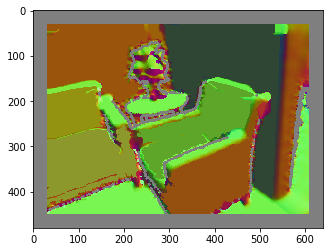

In [13]:
print np.unique(new_normals)
plt.imshow((new_normals + 1) / 2.0)

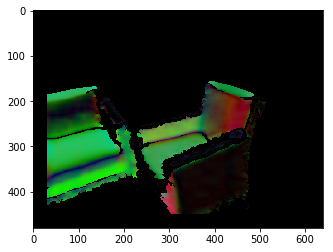

In [14]:
diff = np.abs(new_normals - normals);
plt.imshow(diff)